# Select site area

National Character Areas - Whie Peak Peak District
Cut to Peak District National Park Boundary

In [1]:
# import libraries
import geopandas as gpd
import os

In [33]:
# load the NCA for the PDNP https://naturalengland-defra.opendata.arcgis.com/datasets/national-character-areas-england
nca = "../content/nca_areas/National_Character_Areas___Natural_England.shp"
nca = gpd.read_file(nca)
nca.head()

,JCACODE,JCANAME,NCA_Name,NAID,NANAME,Area_SqKM,Hotlink,ALT,BLT,geometry
0,1.0,North Northumberland Coastal Plain,North Northumberland Coastal Plain,1.0,North Northumberland Coastal Plain,377,http://www.naturalengland.org.uk/publications/...,Eastern Arable,Low-lying coast,"MULTIPOLYGON (((422301.159 632318.690, 422482...."
1,2.0,Northumberland Sandstone Hills,Northumberland Sandstone Hills,2.0,Border Uplands,727,http://www.naturalengland.org.uk/publications/...,Upland Fringe,Sandstone hills and ridges,"POLYGON ((403825.024 607401.362, 404207.117 60..."
2,3.0,Cheviot Fringe,Cheviot Fringe,2.0,Border Uplands,516,http://www.naturalengland.org.uk/publications/...,Upland Fringe,Upland fringe,"POLYGON ((392537.354 604957.562, 392449.791 60..."
3,4.0,Cheviots,Cheviots,2.0,Border Uplands,365,http://www.naturalengland.org.uk/publications/...,Upland,Upland,"POLYGON ((383441.939 630369.938, 383916.376 63..."
4,5.0,Border Moors and Forests,Border Moors and Forests,2.0,Border Uplands,1272,http://www.naturalengland.org.uk/publications/...,Upland,Moorland and moorland fringe,"POLYGON ((378707.748 608194.375, 379362.851 60..."


<AxesSubplot:>

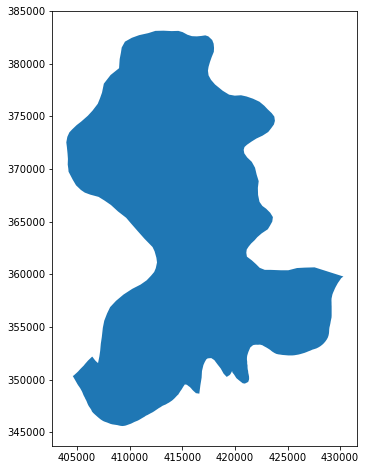

In [34]:
# select the white peak
wp = nca[nca.NCA_Name=="White Peak"]
wp.plot(figsize=(8,8))

In [36]:
# load pdnp boundary https://naturalengland-defra.opendata.arcgis.com/datasets/national-parks-england/explore
np = "../content/pdnp_boundary/National_Parks_(England)___Natural_England.shp"
np = gpd.read_file(np)
pdnp = np[np.NAME=="PEAK DISTRICT"]

<AxesSubplot:>

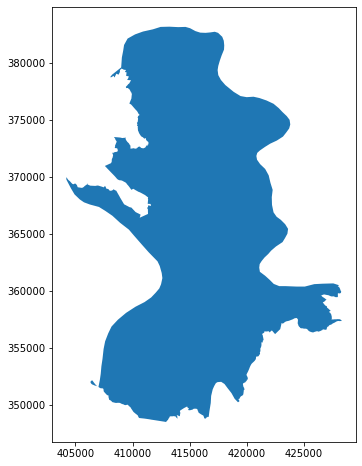

In [37]:
# Cut WP to PDNP boundary
pdnp_wp = gpd.clip(wp,pdnp)
pdnp_wp.plot(figsize=(8,8))

Small area at bottom of the wp nca that doen's quite extend the pdnp boundary. Maybe needs adding back in will give it some thought. Won't matter with intersection of 1km Grid but probably would with a patch intersection. 

## Grid Selector

In [38]:
# load pdnp boundary 
lcg = "../content/landscape_character_grid/Landscape_Character_Grid.shp"
lcg = gpd.read_file(lcg)

<AxesSubplot:>

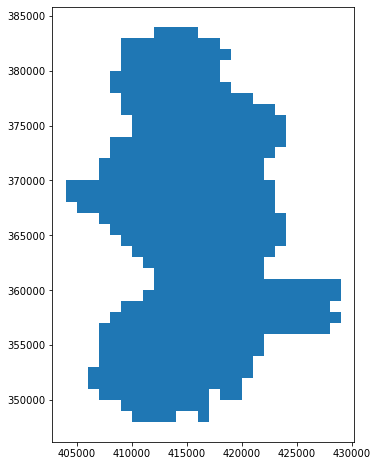

In [39]:
# Select grid by intersection
lcg_wp = gpd.sjoin(lcg, pdnp_wp)
lcg_wp.plot(figsize=(8,8))

In [40]:
# save as a new file 
out_file_path = r"../content/landscape_character_grid/selection_white_peak.shp"
lcg_wp.to_file(out_file_path)

C:\Users\alexad\AppData\Local\Temp\ipykernel_4108\3720138328.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  lcg_wp.to_file(out_file_path)
